## Agenda
<ul>
<li> KNN </li>
<li> Logistic Regression </li>
<li> Support vectore machine </li>
</ul>


In [10]:
!pip install mglearn
!pip install graphviz
import mglearn

     --------------------------------------- 47.0/47.0 kB 27.1 kB/s eta 0:00:00


## K-Nearest Neighbour
1- One of the most easiest supervised learning algorithms </br>
2- To classify a new data point we only find the majority of the k-nearst points</br>
3- Although this algorithm is very simple but it computationaly expensive because every time we should calculate the distance between the new data that needed to be predicted with each point in the train set

C:\Users\Dalia Marzouk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


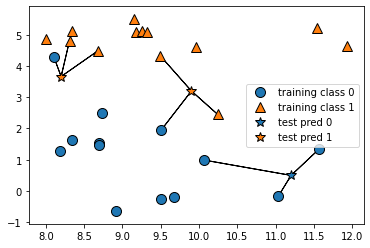

In [23]:
mglearn.plots.plot_knn_classification(3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


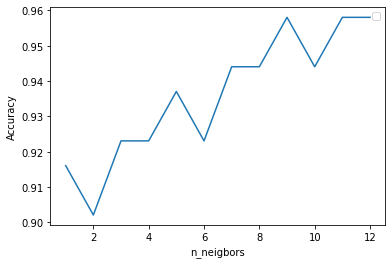

In [2]:
import imp
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

accuracy = []
neigbors_count = range(1, 13)

for count in neigbors_count:
    clf = KNeighborsClassifier(n_neighbors=count)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test, y_test))

plt.plot(neigbors_count, accuracy)
plt.ylabel("Accuracy")
plt.xlabel("n_neigbors")
plt.legend()    

### K-Nearest Neighbors as a Regressor
To estimate the value of the missing point we gave it the avergae value of the neighbors

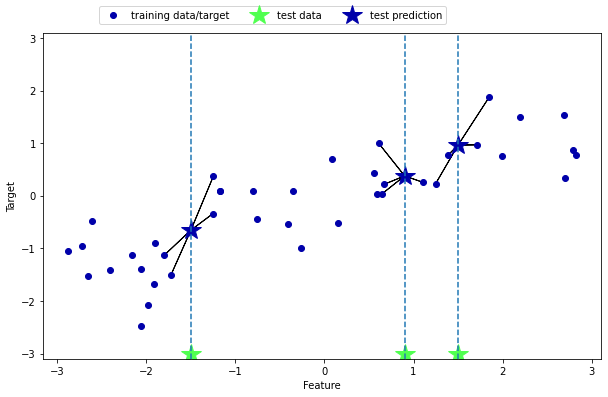

In [6]:


mglearn.plots.plot_knn_regression(n_neighbors=4)

## Bonus Assignments
<ul>
<li> What is the disadvantages of the KNN classifier</li>
<li> How to optimize the KNN algorithm</li>
</ul>

## Logistic Regression
1- Logistic regression is a type of generative supervised models<br/>
2- Its target is to find a function in the shape of the logistic function that simulates the probability of obtaining a certain class<br/>
<img src="images/logisticFn.png" width=400></img>

### Logistic Regression as Multiple Classifier
- Logisitic regression is a binary classifier
- To extend logisitic regression to be used as a multi-class classifier we train n-logisitcregression classifier
- Each classifier generates the probability of obtaining a certain class
- Finally we predict an example as a class that have the maximum probability

## Support Vectore Machine
1- Support Vectore Machine is a type of discriminative models <br/>
2- Its a binary classifier (classifies two categories). To be used as a multi class classifier its idea should be extended (will see at the end of this session) <br/>
3- Its idea depends on setting a margin between two classes that maximizes the separation between them<br/>
<img src="images/svcMargin.png" width=400></img><br/>
4- Hard-margin may lead to overfitting, so we choose to add what is called slack variable to obtain what is called soft-margin<br/>
<img src="images/hard-soft-svm.png" width=400></img><br/><br/>

Ref: https://medium.com/@ankitnitjsr13/math-behind-svm-support-vector-machine-864e58977fdb<br/>
    https://medium.com/geekculture/supervised-learning-support-vector-machine-5941450e0e41<br/>

### Support Vector Machine Kernels
1- To obtain  non-linear boundary we may predict a kernel function instead of using linear funtion<br/>
2- skitlearn implements different kernels like gussian kernel (rbf), polynomial kernel, and sigmoid kernel


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


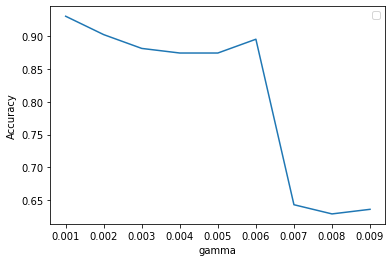

In [31]:
from math import gamma
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

accuracy = []

gamma = 0.001
gammas = []
while gamma < 0.01: 
    gammas.append(gamma) 
    gamma+=0.001

for gamma in gammas:
    clf = SVC(kernel='rbf', gamma=gamma)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test, y_test))

plt.plot(gammas, accuracy)
plt.ylabel("Accuracy")
plt.xlabel("gamma")
plt.legend()  

In [ ]:
#assignment: Implement the previous experiment with the other implemented kernels in the kitlearn library

### Support Vector Machine Regressor
Our objective, when we are moving on with SVR, is to basically consider the points that are within the decision boundary<br/>

<img src="images/SVR.png" width=400> </img>

0.6924455408798785


C:\Users\Dalia Marzouk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


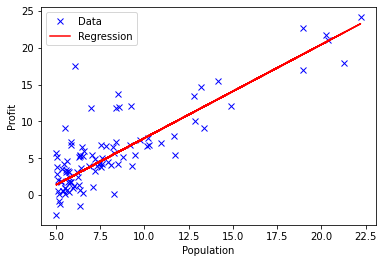

In [6]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Load data from CSV file
# - column 1: population (x)
# - column 2: profit (y)
data = np.loadtxt('data/lr/ex1data1.txt', delimiter=',')
# Separate features (x) from target (y)
X, y = np.hsplit(data, 2)

model = SVR(kernel='linear')
model.fit(X, y)


plt.plot(X, y, 'bx', label='Data')
plt.plot(X, model.predict(X), 'r-', label='Regression')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()

print(model.score(X, y))

### Support Vectore Machine as Multiple Classifier
 To use discriminative models in multiclass classification problem we use <b>one versus many</b> algorithm
<img src="images/multiclass.png"></img></br>
2.1- Here we train n classifiers</br>
2.2- Each classifier is responsible to make a separation between a certain class and the other classes

## Assignment
Use Logistic regression and the support vector machine for performing the sentiment analysis task<br/>
Find the data-set here: http://ai.stanford.edu/~amaas/data/sentiment/